In [0]:
!pip install torch torchvision
!curl -O http://www.saedsayad.com/bm/RNA/GSE36980/gse/web/GSE36980_gse.zip
!unzip GSE36980_gse.zip
%ls

In [0]:
!pip install scikit-learn

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [0]:
!head -2 GSE36980_targets.csv

geo_accession,tissue,age,sex,target
GSM907792,Frontal cortex,84,M,AD


In [0]:
import csv

targets = []

with open('GSE36980_targets.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    targets.append(row[4])
  
targets = targets[1:]
print(targets)

['AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD']


In [0]:
!head -3 GSE36980.csv

GSM907792,GSM907793,GSM907794,GSM907795,GSM907796,GSM907797,GSM907798,GSM907799,GSM907800,GSM907801,GSM907802,GSM907803,GSM907804,GSM907805,GSM907806,GSM907807,GSM907808,GSM907809,GSM907810,GSM907811,GSM907812,GSM907813,GSM907814,GSM907815,GSM907816,GSM907817,GSM907818,GSM907819,GSM907820,GSM907821,GSM907822,GSM907823,GSM907824,GSM907825,GSM907826,GSM907827,GSM907828,GSM907829,GSM907830,GSM907831,GSM907832,GSM907833,GSM907834,GSM907835,GSM907836,GSM907837,GSM907838,GSM907839,GSM907840,GSM907841,GSM907842,GSM907843,GSM907844,GSM907845,GSM907846,GSM907847,GSM907848,GSM907849,GSM907850,GSM907851,GSM907852,GSM907853,GSM907854,GSM907855,GSM907856,GSM907857,GSM907858,GSM907859,GSM907860,GSM907861,GSM907862,GSM907863,GSM907864,GSM907865,GSM907866,GSM907867,GSM907868,GSM907869,GSM907870
4.68986,4.504,5.2582,4.00736,3.92934,3.40423,3.17638,3.67587,4.44021,3.64016,4.436,4.05706,4.16734,2.47025,2.30383,3.34203,3.18422,3.14779,4.21582,4.73946,4.18499,4.02828,4.51592,4.09465,4.36138,4.27444,4.50061

In [0]:
import csv
import numpy as np
from sklearn.preprocessing import normalize

rows = []

with open('GSE36980.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    rows.append(row)

rows = rows[1:]

# rows = normalize(rows)

print(len(rows))
biomarkers = np.array(rows).astype(np.float).T.tolist()
# list(map(list, zip(*rows)))
print(len(biomarkers))

train_markers = biomarkers[3:12] + biomarkers[26:69]
val_markers = biomarkers[:3] + biomarkers[12:26] + biomarkers[69:]

train_labels = targets[3:12] + targets[26:69]
val_labels =  targets[:3] + targets[12:26] + targets[69:]
print(val_labels)
print(train_labels.count('AD'))
print(train_labels.count('non-AD'))
print(train_labels)

33297
79
['AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD']
26
26
['AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'non-AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD', 'AD']


In [0]:
from sklearn import svm

train_labels_formatted = [1 if label == 'AD' else 0 for label in train_labels]
val_labels_formatted = [1 if label == 'AD' else 0 for label in val_labels]

markers_of_interest = []

for i in range(len(np.array(train_markers).T.tolist())):
  marker = np.array(train_markers)[:, i]
  clf = svm.SVC(gamma='scale')
  clf.fit(marker.reshape(-1, 1), train_labels_formatted)
  score = sum([clf.predict(np.array(val_markers[j][i]).reshape(-1, 1))[0] == val_labels_formatted[j] for j in range(len(val_markers))]) / len(val_markers)
  if score > 0.85:
    print('success', i, score)
    markers_of_interest.append(i)
  

success 734 0.8888888888888888
success 2659 0.8888888888888888
success 5630 0.8888888888888888
success 7157 0.8888888888888888
success 13206 0.8888888888888888
success 13478 0.8888888888888888
success 14699 0.8888888888888888
success 16890 0.8888888888888888
success 18424 0.8888888888888888
success 19389 0.8888888888888888
success 21010 0.8888888888888888
success 22295 0.8888888888888888
success 24120 0.8888888888888888
success 24462 0.8888888888888888
success 25788 0.8888888888888888
success 27076 0.8888888888888888
success 27386 0.9259259259259259
success 27732 0.8888888888888888
success 28324 0.8888888888888888
success 29750 0.8888888888888888


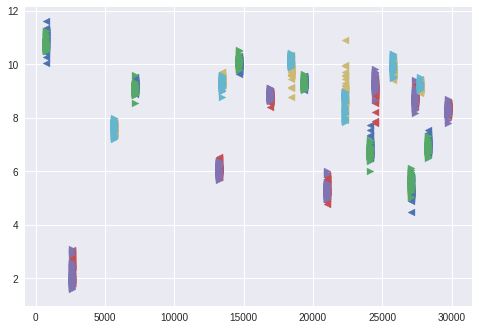

In [0]:
import matplotlib.pyplot as plt

train1=[]
train2=[]

for i in range(len(biomarkers)):
  if targets[i] == 'AD':
    train1.append(biomarkers[i])
  else:
    train2.append(biomarkers[i])

for i in markers_of_interest:
  plt.scatter(np.repeat(i, len(np.array(train1)[:, i])), np.array(train1)[:, i], marker='<')
  plt.scatter(np.repeat(i, len(np.array(train2)[:, i])), np.array(train2)[:, i], marker='>')

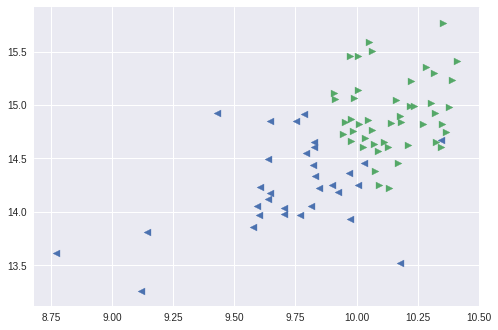

In [0]:
plt.scatter(np.array(train1)[:, 18424], np.add(np.array(train1)[:, 24462], np.array(train1)[:, 27076]), marker='<')
plt.scatter(np.array(train2)[:, 18424], np.add(np.array(train2)[:, 24462], np.array(train2)[:, 27076]), marker='>')

In [0]:
from sklearn import svm
from sklearn.decomposition import PCA

pca = PCA(n_components=52)
pca.fit(train_markers)
trans_train_markers = pca.transform(train_markers)
trans_val_markers = pca.transform(val_markers)

print(trans_train_markers.shape)

# clf = svm.SVC(gamma='scale')
# clf.fit(trans_train_markers, train_labels_formatted)
# print([clf.predict([val_marker]) for val_marker in trans_val_markers])

(52, 52)


26
26


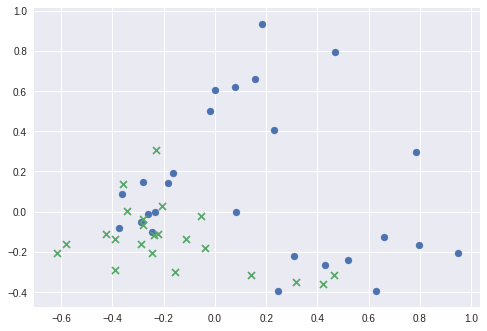

In [0]:
import matplotlib.pyplot as plt

trans1 = []
trans2 = []

for i in range(len(trans_train_markers)):
  if train_labels[i] == 'AD':
    trans1.append(trans_train_markers[i])
  else:
    trans2.append(trans_train_markers[i])

X1 = [x[0] for x in trans1]
Y1 = [x[1] for x in trans1]

print(len(X1))
print(len(Y1))
      
X2 = [x[0] for x in trans2]
Y2 = [x[1] for x in trans2]
plt.scatter(X1, Y1, marker='o')
plt.scatter(X2, Y2, marker='x')

In [0]:
from sklearn import svm

clf = svm.SVC(gamma='scale')
clf.fit(trans_train_markers, train_labels_formatted)
print([clf.predict([trans_val_marker])[0] for trans_val_marker in trans_val_markers])
print(val_labels_formatted)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [0]:
import torch.utils.data as utils

def to_dataloader(x, y, batch_size):
  my_x = [np.asarray(patient_data) for patient_data in x] # a list of numpy arrays
  my_y = [np.asarray([1] if patient_label == 'AD' else [0]) for patient_label in y] # another list of numpy arrays (targets)
  
  tensor_x = torch.stack([torch.Tensor(i) for i in my_x]) # transform to torch tensors
  tensor_y = torch.stack([torch.Tensor(i) for i in my_y])

  my_dataset = utils.TensorDataset(tensor_x,tensor_y) # create your datset
  my_dataloader = utils.DataLoader(my_dataset, shuffle=True, batch_size=batch_size) # create your dataloader
  return my_dataloader

loader_train = to_dataloader(trans_train_markers, train_labels, 52)
loader_val = to_dataloader(trans_val_markers, val_labels, 1)

In [0]:
import torch
import torch.nn as nn

class SampleCNN(nn.Module):
    def __init__(self):
        super(SampleCNN, self).__init__()
        # 52 x 1
        self.conv7 = nn.Sequential(
            nn.Conv1d(1, 16, kernel_size=3, stride=3, padding=1),
#             nn.BatchNorm1d(64),
            nn.ReLU())
        # 17 x 64
        self.conv8 = nn.Sequential(
            nn.Conv1d(16, 32, kernel_size=3, stride=1, padding=0),
#             nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.MaxPool1d(3,stride=3))
        # 5 x 256
        self.conv9 = nn.Sequential(
            nn.Conv1d(32, 32, kernel_size=3, stride=1, padding=0),
#             nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.MaxPool1d(3,stride=3))
        # 1 x 256
        self.fc1 = nn.Linear(52 * 52, 128)
        self.fc2 = nn.Linear(128, 1)
        self.activation = nn.Sigmoid()
    
    def forward(self, x):
        # input x : 6 x 33297
        # expected conv1d input : minibatch_size x num_channel x width

        x = x.view(x.shape[0], 1,-1)
        # x : 6 x 1 x 33297
#         out = self.conv7(x)
#         out = self.conv8(out)
#         out = self.conv9(out)
        out = x
#         out = out.view(x.shape[0], out.size(1) * out.size(2))
        out = self.fc1(out)
        logit = self.fc2(out)

        logit = self.activation(logit)
        
        return logit

In [0]:
import torch
import torch.nn as nn

dropout = 0.5

class SampleCNN(nn.Module):
    def __init__(self):
        super(SampleCNN, self).__init__()

#         # 33297 x 1
#         self.conv1 = nn.Sequential(
#             nn.Conv1d(1, 128, kernel_size=3, stride=3, padding=0),
#             nn.BatchNorm1d(128),
#             nn.ReLU())
#         # 11099 x 128
#         self.conv2 = nn.Sequential(
#             nn.Conv1d(128, 128, kernel_size=3, stride=1, padding=0),
#             nn.BatchNorm1d(128),
#             nn.ReLU(),
#             nn.MaxPool1d(3, stride=3))
#         # 3699 x 128
#         self.conv3 = nn.Sequential(
#             nn.Conv1d(128, 128, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm1d(128),
#             nn.ReLU(),
#             nn.MaxPool1d(3,stride=3))
#         # 1233 x 128
#         self.conv4 = nn.Sequential(
#             nn.Conv1d(128, 256, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm1d(256),
#             nn.ReLU(),
#             nn.MaxPool1d(3,stride=3))
#         # 411 x 256
#         self.conv5 = nn.Sequential(
#             nn.Conv1d(256, 256, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm1d(256),
#             nn.ReLU(),
#             nn.MaxPool1d(3,stride=3))
        # 137 x 256
        self.conv6 = nn.Sequential(
            nn.Conv1d(1, 256, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.MaxPool1d(3,stride=3))
#             nn.Dropout(dropout))
        # 45 x 256
        self.conv7 = nn.Sequential(
            nn.Conv1d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.MaxPool1d(3,stride=3))
        # 15 x 256
        self.conv8 = nn.Sequential(
            nn.Conv1d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.MaxPool1d(3,stride=3))
        # 5 x 256
        self.conv9 = nn.Sequential(
            nn.Conv1d(256, 256, kernel_size=3, stride=1, padding=0),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.MaxPool1d(3,stride=3))
        # 1 x 256
#         self.conv10 = nn.Sequential(
#             nn.Conv1d(256, 256, kernel_size=3, stride=1, padding=1),
#             nn.BatchNorm1d(512),
#             nn.ReLU(),
#             nn.Dropout())
        self.fc = nn.Linear(256, 1)
        self.activation = nn.Sigmoid()
    
    def forward(self, x):
        # input x : 6 x 33297
        # expected conv1d input : minibatch_size x num_channel x width

        x = x.view(x.shape[0], 1,-1)
        # x : 6 x 1 x 33297

#         out = self.conv1(x)
#         out = self.conv2(out)
#         out = self.conv3(out)
#         out = self.conv4(out)
#         out = self.conv5(out)
        out = self.conv6(x)
        out = self.conv7(out)
        out = self.conv8(out)
        out = self.conv9(out)
#         out = self.conv10(out)
        
        out = out.view(x.shape[0], out.size(1) * out.size(2))
        logit = self.fc(out)

        logit = self.activation(logit)
        
        return logit

In [0]:
USE_GPU = True
dtype = torch.float32 
torch.manual_seed(0)

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

bce = nn.BCELoss()
    
    
def check_accuracy(loader, model):
    # function for test accuracy on validation and test set
    
    print('Checking accuracy on validation/test set')
    
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for t, (x, y) in enumerate(loader):
#             print(x, y)
            x = x.to(device=device, dtype=dtype)  # move to device
#             print(x)
            y = y.to(device=device, dtype=dtype)
            scores = model(x)
#             print(scores)
            _, preds = scores.max(1)
#             print(preds)
#             print(y.round().long())
            num_correct += (preds == y.long()).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / (num_samples * x.size(0))
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples * x.size(0), 100 * acc))
        return acc

def train_part(model, optimizer, epochs=1):
    """
    Train a model on CIFAR-10 using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: Nothing, but prints model accuracies during training.
    """
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=dtype)

            scores = model(x)
#             print(scores, y)
            train_err = sum([scores[i].round() == y[i] for i in range(len(scores))]).type(torch.float32) / len(scores)
            print(train_err)
    
            loss = bce(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            loss.backward()

            # Update the parameters of the model using the gradients
            optimizer.step()

            print('Epoch: %d, Iteration %d, loss = %.4f' % (e, t, loss.item()))
            check_accuracy(loader_train, model)
            check_accuracy(loader_val, model)
            print()

In [0]:
import torch.optim as optim

def weights_init(m):
    if isinstance(m, nn.Conv2d):
        xavier(m.weight.data)
        if m.bias is not None:
          xavier(m.bias.data)

# define and train the network
model = SampleCNN()
model.apply(weights_init)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

train_part(model, optimizer, epochs = 20)


# report test set accuracy
check_accuracy(loader_val, model)


# save the model
torch.save(model.state_dict(), 'model.pt')

In [0]:
model.eval()  # set model to evaluation mode
count = 0
with torch.no_grad():
  for t, (x, y) in enumerate(loader_val):
    count += (model(x).round() == y)
    print(model(x), y)
print(count.item() / len(loader_val))

tensor([[0.5026]]) tensor([[0.]])
tensor([[0.5067]]) tensor([[1.]])
tensor([[0.5052]]) tensor([[0.]])
tensor([[0.5074]]) tensor([[1.]])
tensor([[0.5039]]) tensor([[0.]])
tensor([[0.5044]]) tensor([[0.]])
tensor([[0.5042]]) tensor([[0.]])
tensor([[0.5057]]) tensor([[0.]])
tensor([[0.5029]]) tensor([[0.]])
tensor([[0.5024]]) tensor([[0.]])
tensor([[0.5025]]) tensor([[0.]])
tensor([[0.5053]]) tensor([[0.]])
tensor([[0.5014]]) tensor([[0.]])
tensor([[0.5029]]) tensor([[0.]])
tensor([[0.5070]]) tensor([[1.]])
tensor([[0.5058]]) tensor([[1.]])
tensor([[0.5030]]) tensor([[0.]])
tensor([[0.5042]]) tensor([[0.]])
tensor([[0.5034]]) tensor([[1.]])
tensor([[0.5028]]) tensor([[0.]])
tensor([[0.5013]]) tensor([[0.]])
tensor([[0.5045]]) tensor([[0.]])
tensor([[0.5065]]) tensor([[0.]])
tensor([[0.5055]]) tensor([[0.]])
tensor([[0.5047]]) tensor([[0.]])
tensor([[0.5052]]) tensor([[1.]])
tensor([[0.5007]]) tensor([[0.]])
0.2222222222222222


In [0]:
check_accuracy(loader_val, model)

Checking accuracy on validation/test set
tensor([[0.4783]])
tensor([[0.4772]])
tensor([[0.4787]])
tensor([[0.4791]])
tensor([[0.4761]])
tensor([[0.4783]])
Got 3 / 6 correct (50.00)


0.5

In [0]:
check_accuracy(loader_train, model)

Checking accuracy on validation/test set
tensor([[4.8544e-06],
        [5.5474e-06],
        [7.9946e-06],
        [7.4428e-06],
        [7.4875e-06],
        [8.6369e-06],
        [5.0672e-06],
        [5.2040e-06],
        [5.3980e-06],
        [4.6464e-06],
        [9.9121e-06],
        [4.7179e-06],
        [5.1232e-06],
        [5.0366e-06],
        [7.4417e-06],
        [5.8650e-06],
        [4.7931e-06],
        [5.8440e-06],
        [6.1195e-06],
        [5.0469e-06],
        [5.6498e-06],
        [4.2148e-06],
        [6.0482e-06],
        [4.7606e-06],
        [5.8148e-06],
        [5.2440e-06],
        [9.8019e-06],
        [5.3831e-06],
        [7.7232e-06],
        [5.4242e-06],
        [4.9744e-06],
        [5.9519e-06],
        [5.0614e-06],
        [5.9144e-06],
        [7.0138e-06],
        [5.3935e-06],
        [7.9849e-06],
        [5.2779e-06],
        [1.0214e-05],
        [5.9370e-06],
        [5.5868e-06],
        [6.5282e-06],
        [9.3570e-06],
        [6.95

0.46938775510204084